In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [2]:
from sklearn.preprocessing import StandardScaler
import joblib

In [3]:
df = pd.read_csv('Datasets/heart_new.csv')
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [4]:
X = df.copy()
ss = StandardScaler()
ss.fit(X[num_cols])

X[num_cols] = ss.transform(X[num_cols])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df[num_cols].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [7]:
sns.set_style('whitegrid')

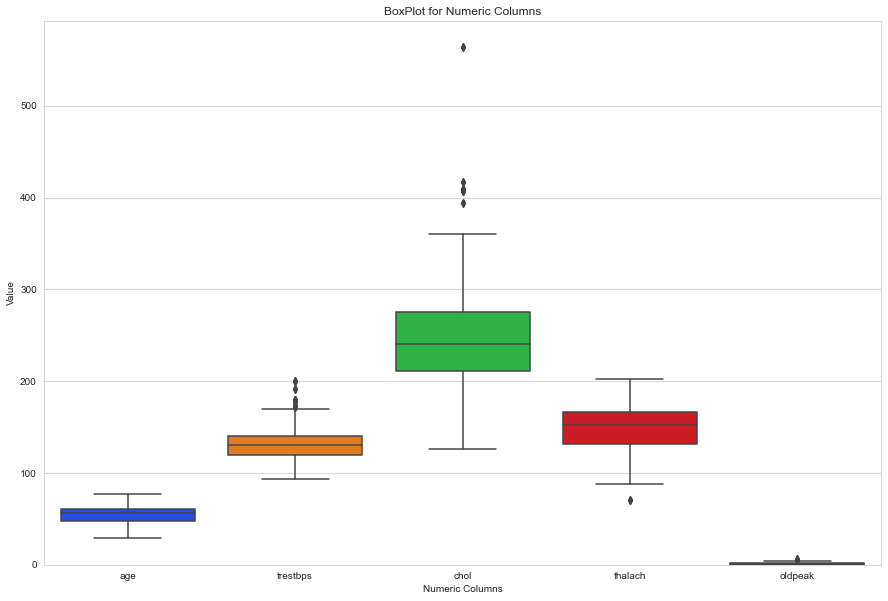

In [9]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(data=df[num_cols], palette='bright')
ax.set_xlabel("Numeric Columns")
ax.set_ylabel("Value")
ax.set_title("BoxPlot for Numeric Columns")
plt.ylim(0, None)
plt.savefig('Figures/boxplot.svg')
plt.show()

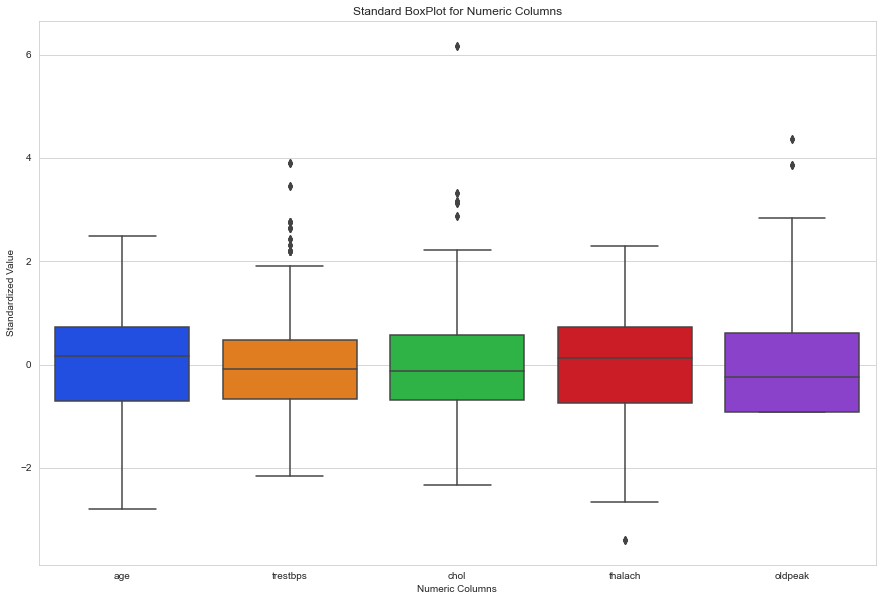

In [10]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(data=X[num_cols], palette='bright')
ax.set_xlabel("Numeric Columns")
ax.set_ylabel("Standardized Value")
ax.set_title("Standard BoxPlot for Numeric Columns")
plt.savefig('Figures/boxplot_standard.svg')
plt.show()

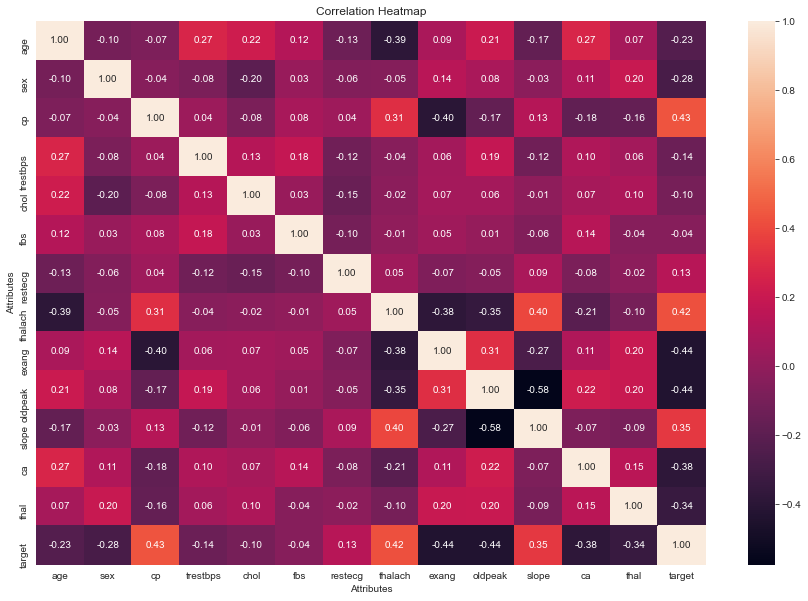

In [11]:
corr = df.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt='.2f')
ax.set_xlabel("Attributes")
ax.set_ylabel("Attributes")
ax.set_title("Correlation Heatmap")
plt.savefig('Figures/heatmap.svg')
plt.show()

The `size` parameter has been renamed to `height`; please update your code.


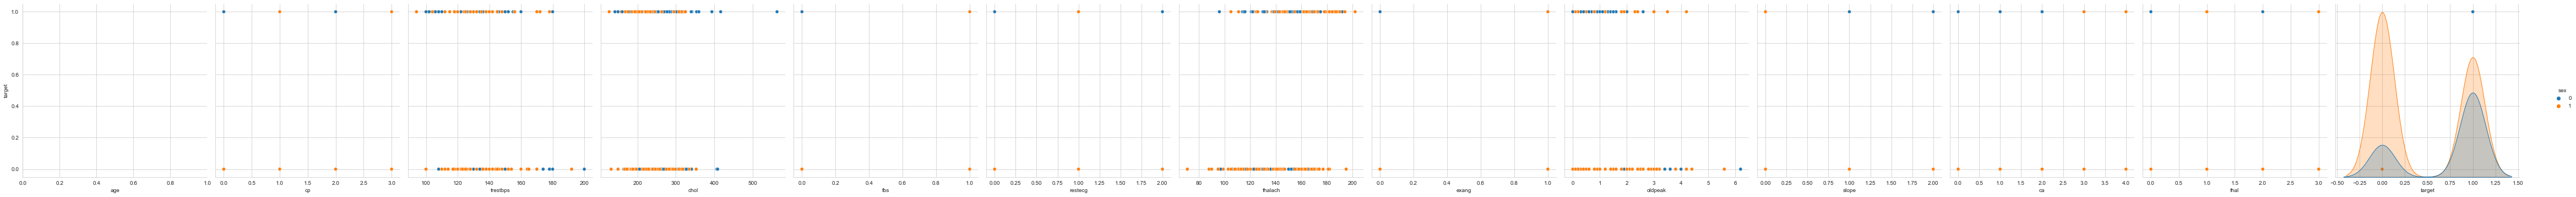

In [12]:
sns.pairplot(df, y_vars=['target'], hue='sex', size = 5)

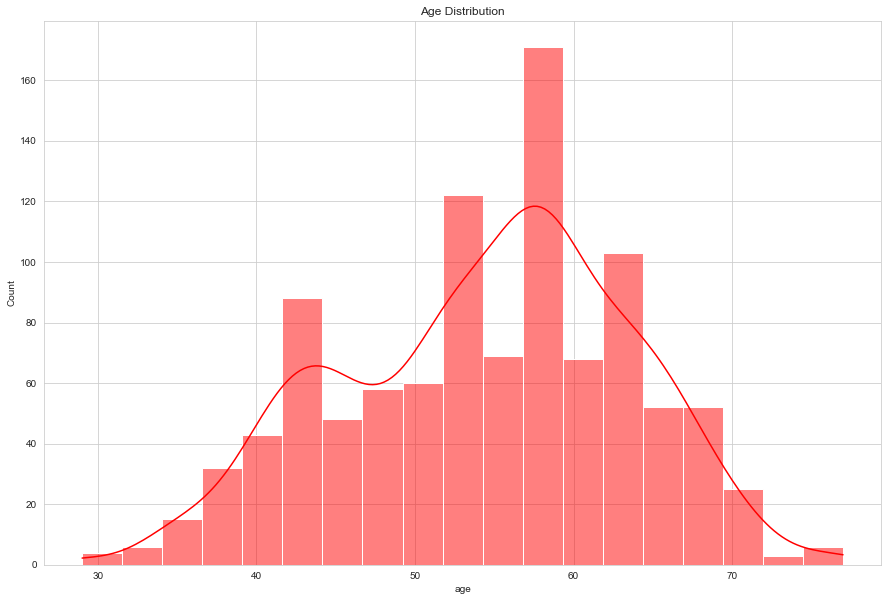

In [13]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.histplot(df.age, color='red', kde=True)
ax.set_title("Age Distribution")
plt.savefig('Figures/hist.svg')
plt.show()

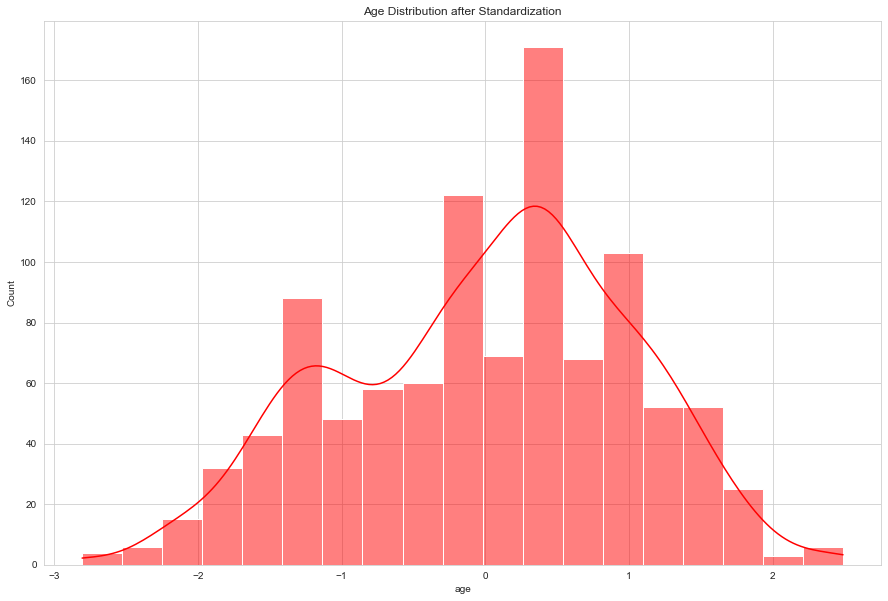

In [14]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.histplot(X.age, color='red', kde=True,)
ax.set_title("Age Distribution after Standardization")
plt.savefig('Figures/hist_std.svg')
plt.show()

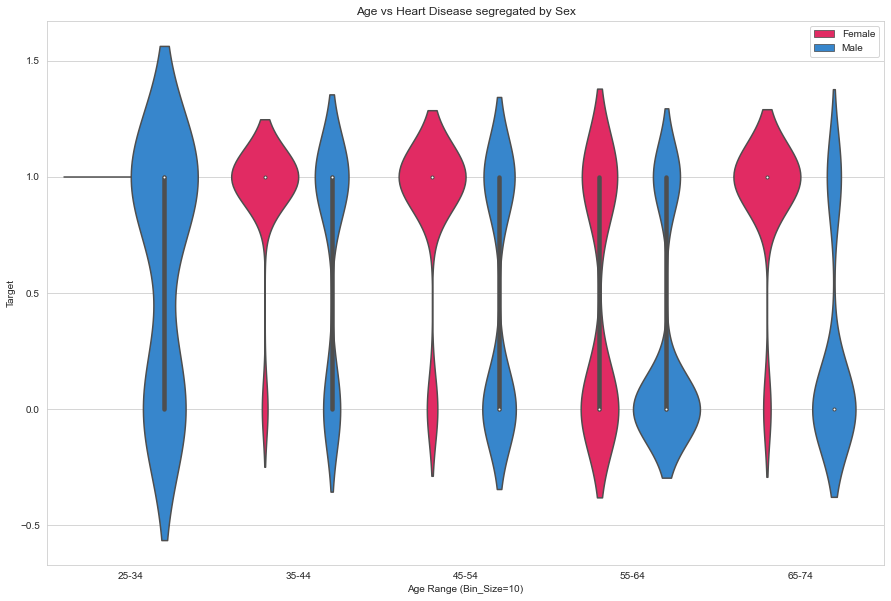

In [17]:
f, ax = plt.subplots(figsize=(15, 10))

bins = list(range(25,85,10))
bin_labels = ["25-34", "35-44", "45-54", "55-64", "65-74"]

ax = sns.violinplot(data=df, x=pd.cut(df['age'], bins, labels=bin_labels, include_lowest=True), y='target', hue='sex', palette=["#FF0D57", "#1E88E5"])

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Female', 'Male']
plt.legend(handles,labels)

ax.set_xlabel("Age Range (Bin_Size=10)")
ax.set_ylabel("Target")
ax.set_title("Age vs Heart Disease segregated by Sex")
plt.savefig('Figures/violin.svg')
plt.show()

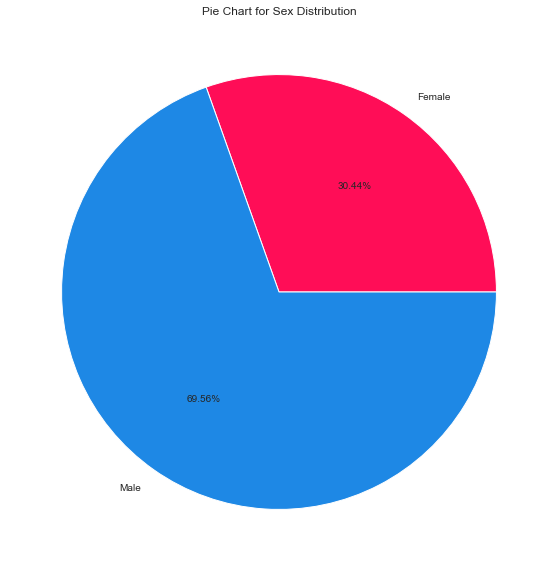

In [16]:
f, ax = plt.subplots(figsize=(15, 10))
ax.pie([sum(df['sex'] == 0), sum(df['sex'] == 1)], labels=['Female', 'Male'], autopct='%1.2f%%', colors=["#FF0D57", "#1E88E5"])
ax.set_title("Pie Chart for Sex Distribution")
plt.savefig('Figures/pie.svg')
plt.show()